# Contexte
Le jeu vidéo est de nos jours l'industrie culturelle la plus lucrative, surpassant largement depuis plusieurs années le cinéma. En 2020
cette industrie avait une valeur à l'échelle mondiale de 159.3 milliards de dollars, contre 41,7 milliards pour l'industrie du cinéma.

Cependant tous les jeux vidéos ne se vendent pas de la même façon, le succès d'un jeu vidéo est souvent déterminé par plusieurs facteurs, tels que son genre, sa plateforme, son développeur, son éditeur et sa réception critique et il est important pour les acteurs de cette industrie de savoir si un jeu se vendra ou non.  

Dans cette analyse nous chercherons à trouver un lien entre ces différentes variables en appliquant des modèles de regression.

# Jeu de données 
https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings?datasetId=576&language=Python

Ce jeu de données est un jeu combinant:

-d'une part des données sur les jeux vidéos eux-mêmes, avec leurs années de sortie, plateformes sur lesquelles ils sont sortis, genre, Editeur, et des données sur les ventes globales et régionales de ces jeux.

-d'autre part des données issues du site internet Metacritic. Ce site compile des critiques issues d'usagers et de critiques professionels. Cela ajoute au jeu de données un score moyen pour la critique professionelle ainsi qu'un nombre de critique et de même pour les usagers.

<span style="color:magenta">Cependant nous avons beaucoup de données Metacritic manquantes, il faut donc procéder à une étape préalable de prétraitement</span>

# Imports

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Lecture du fichier et nettoyage des données

In [80]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
taille_origine = len(df)
print(df.isnull().sum())
print("voici le nombre de données manquante par colonne du tableau")
#supprimons les lignes ayant des données manquantes
df = df.dropna()
taille_sans_na=len(df) 
print(f"nous passons de {taille_origine} jeux à {taille_sans_na} jeux dans notre jeu de données en enlevant les données manquantes")


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
voici le nombre de données manquante par colonne du tableau
nous passons de 16719 jeux à 6825 jeux dans notre jeu de données en enlevant les données manquantes


<span style="color:magenta">ceci est logique, le site internet metacritic a peu d'informations sur les jeux vidéos un peu datés.

Nous supprimons donc toute ligne avec des données manquante</span>


# Recherche de duplicata potentiels

In [81]:
print(df.loc[df.duplicated(subset=['Name'])])
#tous les jeux étant sortis sur plusieurs plateforme apparaissent avec cette requête

                                    Name Platform  Year_of_Release     Genre   
23                    Grand Theft Auto V     X360           2013.0    Action  \
35            Call of Duty: Black Ops II     X360           2012.0   Shooter   
37        Call of Duty: Modern Warfare 3      PS3           2011.0   Shooter   
41               Call of Duty: Black Ops      PS3           2010.0   Shooter   
42                    Grand Theft Auto V      PS4           2014.0    Action   
...                                  ...      ...              ...       ...   
16601        Saints Row: Gat out of Hell     XOne           2015.0    Action   
16618           Legacy of Kain: Defiance       PC           2003.0    Action   
16634           Sébastien Loeb Rally Evo     XOne           2016.0    Racing   
16677     Mortal Kombat: Deadly Alliance      GBA           2002.0  Fighting   
16696  Metal Gear Solid V: Ground Zeroes       PC           2014.0    Action   

                          Publisher  NA

In [82]:
df.loc[df.duplicated(subset=['Name','Platform'])]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.0,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
11716,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.0,0.06,0.00,0.02,0.08,82.0,19.0,8.5,525.0,Black Box,T
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.0,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


In [83]:
df[df["Name"]=="Need for Speed: Most Wanted"]


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36.0,9.1,137.0,EA Canada,T
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,134.0,EA Canada,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32.0,8.8,29.0,EA Canada,T
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,80.0,18.0,9.1,22.0,EA Canada,T
5973,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19.0,8.5,525.0,Black Box,T
6411,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27,45.0,4.0,6.1,22.0,EA Canada,E
11716,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08,82.0,19.0,8.5,525.0,Black Box,T


<span style="color:magenta">"Need for Speed : Most Wanted" a eu un remake en 2012, mais sinon pas de données dupliquées</span>

In [84]:
df[df["Name"]=="Madden NFL 13"]
#On a deux entrées pour Madden NFL 13 sur la PS3, supprimons celle qui n'a aucune vente
df.drop(df.loc[(df['NA_Sales'] == 0) & (df["Name"] == "Madden NFL 13")].index, inplace = True)

On s'assure que toutes les données ont le même type

In [85]:
df.dtypes
df[["Name","Platform","Genre","Publisher","Developer","Rating"]] = df[["Name","Platform","Genre","Publisher","Developer","Rating"]].astype(str)
df["User_Score"] = df["User_Score"].astype(float)
df["Year_of_Release"] = df["Year_of_Release"].astype(int)
df.dtypes

Name                object
Platform            object
Year_of_Release      int32
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

# Corrélation entre les variables numériques

<Axes: >

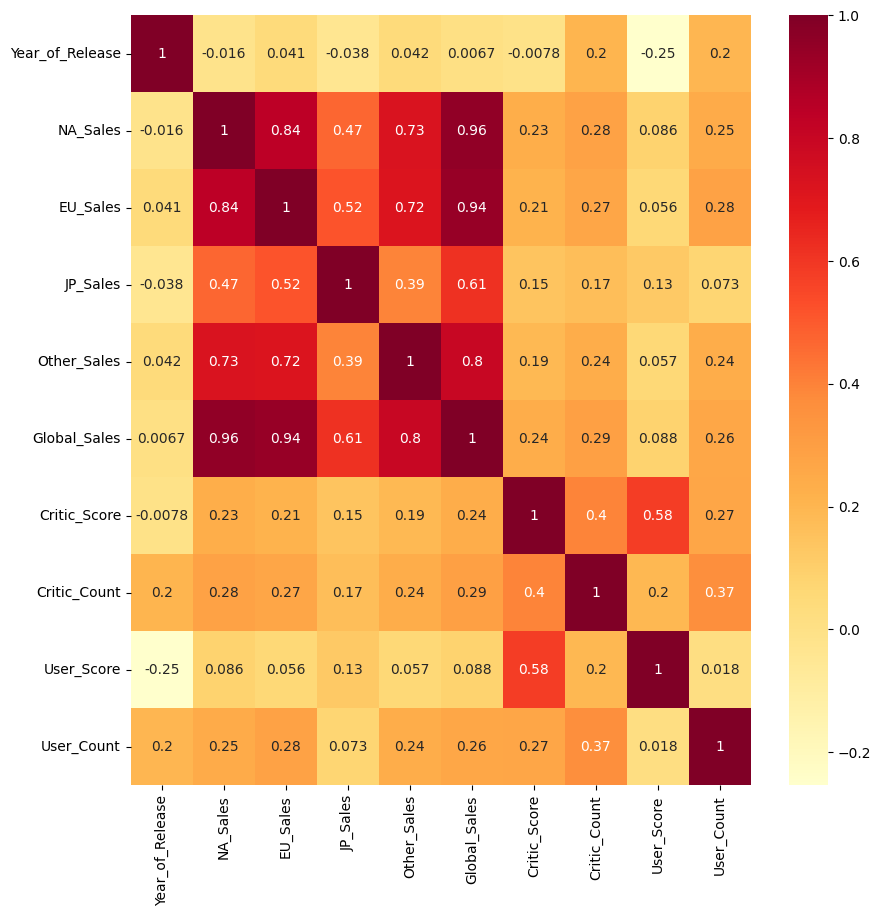

In [86]:
fig = plt.figure(figsize=(10,10))
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,  cmap='YlOrRd')
#corrélation entre les variables

On observe sans surprise que les colonnes de ventes (ventes aux US, en Europe, au japon) sont très corrélées entre elles (le Japon un peu moins car ce marché est réputé pour avoir ses particularités) <span style="color:magenta">nous nous interesserons uniquement aux ventes globales</span> dans notre modèle, et donc <span style="color:magenta">**supprimerons les autres valeurs de vente**</span>

<span style="color:magenta">User_Score et Critic_Score sont aussi assez corrélées, un bon jeu sera souvent apprécié par les critique professionnels et par les joueurs normaux en même temps</span>

In [87]:
#On supprime du jeu de données les ventes par régions. On supprime aussi le nom des jeux qui est une donnée inutisable
df.drop(['NA_Sales','EU_Sales','JP_Sales',"Other_Sales","Name"], axis=1,inplace=True)

In [88]:
# Somme cumulative des ventes par année
sales_by_publisher = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
cumulative_sales = sales_by_publisher.cumsum()
total_sales = cumulative_sales.max()

# Determiner how many publishers represent 90% of sales
top_publishers = (cumulative_sales / total_sales).lt(0.9).sum() + 1

print(f'{top_publishers} éditeurs represent 90% des ventes')

#Même chose mais avec les developpeurs et pour 80% des données 
sales_by_dev = df.groupby('Developer')['Global_Sales'].sum().sort_values(ascending=False)
cumulative_sales_dev = sales_by_dev.cumsum()
total_sales_dev = cumulative_sales.max()

top_dev = (cumulative_sales_dev / total_sales_dev).lt(0.8).sum() + 1
print(f'{top_dev} devs representent 80% des ventes')

20 éditeurs represent 90% des ventes
178 devs representent 80% des ventes


<span style="color:magenta">On cherche à réduire la dimension de notre regression en mettant les éditeurs et developpeurs vendant le moins dans la catégorie "autres" </span>

In [89]:
df['Developer'] = df['Developer'].apply(lambda s: s if s not in sales_by_dev[top_dev:] else 'Autres')
df['Publisher'] = df['Publisher'].apply(lambda s: s if s not in sales_by_publisher[top_publishers:] else 'Autres')

# One hot encoding des données catégorielles

In [90]:
ct = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(sparse=False), ["Platform", "Developer","Genre","Rating","Publisher"]),
    ],
    remainder="passthrough",).set_output(transform="pandas")
df_ohe=ct.fit_transform(df)


c:\Users\amine\OneDrive\Bureau\IODAA\venv_python\new_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
# Prepare the data
X = df_ohe.drop(['remainder__Global_Sales'], axis=1)
y = df_ohe['remainder__Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Choix du modèle

In [95]:
#Grille d'hyperparamètres pour le grid search
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge Regression', Ridge(), {'alpha': [0.1, 1, 10]}),
    ('Lasso Regression', Lasso(), {'alpha': [0.1, 1, 10]}),
    ('Elastic Net Regression', ElasticNet(), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.3, 0.5, 0.7]}),
    ('Decision Tree', DecisionTreeRegressor(), {'max_depth': [3, 5, 7, None], 'min_samples_leaf': [1, 2, 5]}),
    ('Random Forest', RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, None]}),
    ('XGBoost', xgb.XGBRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),]
#('SVR', SVR(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']})
"""SVR:
  Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
  Mean Absolute Error: 0.6020
  Mean Squared Error: 2.3701
  R² Score: 0.1279"""
#les résultats sont très mauvais pour la SVR et ralentissent énormément le temps d'exécution donc nous ne le considérons pas
# Optimisation des modèles par gridsearch + cross-validation
best_model = None
best_r2 = float('-inf')

for model_name, model, params in models:
    grid_search = GridSearchCV(model, param_grid=params, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    y_pred = grid_search.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    if model_name=="Random Forest":
      params_rf=best_params
    if model_name=="XGBoost":
      params_xgb=best_params
    print(f'{model_name}:')
    print(f'  Meilleurs paramètres: {best_params}')
    print(f'  Mean Absolute Error: {mae:.4f}')
    print(f'  Mean Squared Error: {mse:.4f}')
    print(f'  R² Score: {r2:.4f}')
    print()

    if r2 > best_r2:
        best_r2 = r2
        best_model = (model_name, model, best_params)

print(f'Le meilleur modèle est {best_model[0]} avec les paramètres: {best_model[2]} et un R² de {best_r2:.4f}')


Linear Regression:
  Meilleurs paramètres: {}
  Mean Absolute Error: 0.7511
  Mean Squared Error: 2.5986
  R² Score: 0.3726

Ridge Regression:
  Meilleurs paramètres: {'alpha': 1}
  Mean Absolute Error: 0.6636
  Mean Squared Error: 2.2877
  R² Score: 0.4477

Lasso Regression:
  Meilleurs paramètres: {'alpha': 0.1}
  Mean Absolute Error: 0.7382
  Mean Squared Error: 3.5468
  R² Score: 0.1437

Elastic Net Regression:
  Meilleurs paramètres: {'alpha': 0.1, 'l1_ratio': 0.3}
  Mean Absolute Error: 0.6992
  Mean Squared Error: 3.3087
  R² Score: 0.2012

Decision Tree:
  Meilleurs paramètres: {'max_depth': 3, 'min_samples_leaf': 1}
  Mean Absolute Error: 0.7159
  Mean Squared Error: 2.9465
  R² Score: 0.2886

Random Forest:
  Meilleurs paramètres: {'max_depth': None, 'n_estimators': 50}
  Mean Absolute Error: 0.4310
  Mean Squared Error: 1.4618
  R² Score: 0.6471

XGBoost:
  Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
  Mean Absolute Error: 0.4772
  Mean 

<span style="color:magenta">Le meilleur modèle alterne selon les itérations du grid search entre le Random Forest Regressor et XGBoost avec un R² autour de 0.7. Les deux modèles priorisent des choses différentes (cf. *infra*) donc nous conservons les paramètres de ces deux modèles</span>

# Importance des features dans le modèle

On cherche maintenant à entrainer le modèle sur l'ensemble des données et à voir quelles variables ont le plus d'influence sur la vente 

In [97]:
best_rf=RandomForestRegressor(**params_rf)
best_xgb=xgb.XGBRegressor(**params_xgb)
best_rf.fit(X,y)
best_xgb.fit(X,y)
importances_rf = best_rf.feature_importances_
importance_rf_df = pd.DataFrame({"feature": X_train.columns, "importance": importances_rf})
importance_rf_df = importance_rf_df.sort_values(by="importance", ascending=False)

importances_xgb = best_xgb.feature_importances_
importance_xgb_df = pd.DataFrame({"feature": X_train.columns, "importance": importances_xgb})
importance_xgb_df=importance_xgb_df.sort_values(by="importance", ascending=False)


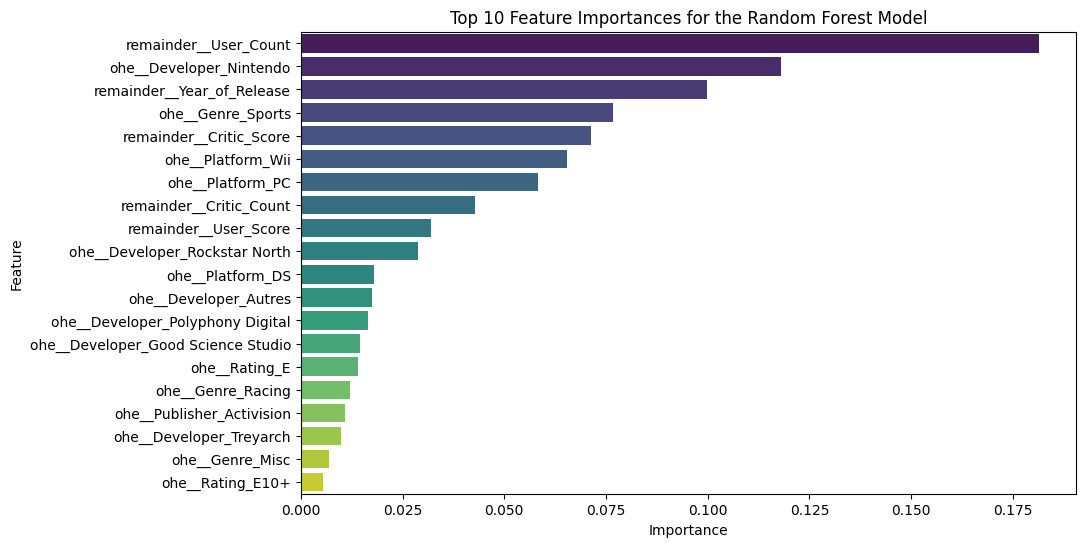

In [98]:
top_10_features_rf = importance_rf_df.head(20)
top_10_features_xgb=importance_xgb_df.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=top_10_features_rf, palette="viridis")
plt.title("Top 10 Feature Importances for the Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

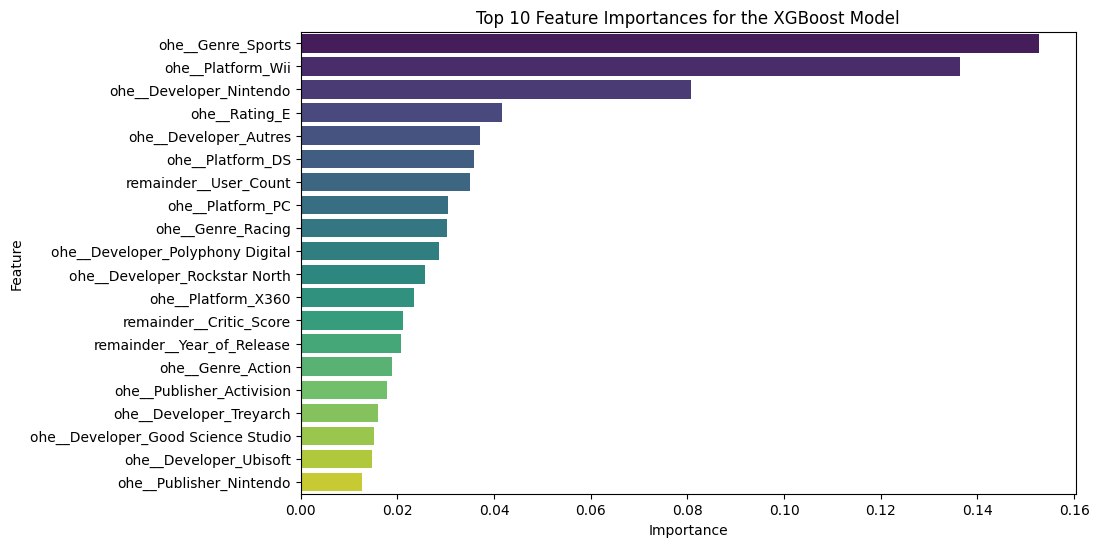

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=top_10_features_xgb, palette="viridis")
plt.title("Top 10 Feature Importances for the XGBoost Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

<span style ="color:magenta">On remarque que les deux modèles ont théoriquement des performances similaires mais priorisent des choses différentes.  

* <span style ="color:magenta">Random Forest considère d'abord User_count (le nombre de reviews par des utilisateurs de Metacritic), l'année de sortie (le jeu vidéo est une industrie en pleine expansion donc il parait logique que chaque année de plus en plus de jeux soient vendus) et si c'est un jeu de Sport ou non avant de considérer l'avis de la critique sur le jeu.</span>
* <span style ="color:magenta">Inversement XGBoost considère "jeu de sport" puis "jeu de wii" puis ensuite "Rating_E" (équivalent de PEGI 3 chez nous, i.e jeu déconseillé à aucun public) et ensuite "Developper_Autres" c'est à dire que si le jeu est développé par un studio qui n'appartient pas aux studios qui font 80% des ventes. Cela pourrait être possible mais cela semble étrange qu'une valeur représentant 1100 des 1200 studios dans le jeu de données ait tant d'influence sur le résultat final</span>

<span style ="color:magenta">Néanmoins, de manière peu surprenante car les jeux Nintendo se vendent tous très bien et ce depuis le début de l'industrie, les deux modèles considèrent "être un jeu Nintendo" comme une variable majeure sur le succès d'un jeu  
On peut néanmoins se démander si "Wii Sports" jeu Nintendo de sport n°1 aux classement des ventes et qui a des ventes 2 fois supérieures au jeu n°2 n'est pas un outlier influant sur les résultats finaux</span>

# Possibilité d'utiliser le modèle en inférence

Il serait possible d'utiliser ce modèle en inférence pour predire les ventes d'un jeu à partir de données sur le jeu et sa récéption critique.

Cela pose cependant plusieurs problèmes pour une utilisation réelle du modèle. (Pour par exemple savoir si le développement d'un jeu serait excédentaire après les couts de développement) 

* L'âge des données : La plupart des consoles sur lesquelles un jeu moderne sortirait (PS5, XBox Seris X, Switch) ne sont pas présentes dans la base d'entrainement. De plus l'année de sortie est un paramètre du modèle, on pourrait donc se demander comment le modèle réagirait à des années supérieures à 2017
* Dans une vraie situation on peut imaginer recevoir une évaluation critique avant la sortie d'un jeu (Critic_Score). Cependant il serait impossible de connaître le nombre de ces critiques (Critic_count) ou quoi que ce soit sur la récéption critique par les utilisateurs de Metacritic (User_Count et User_Score)

Ainsi pour une utilisation réelle du modèle pour prédire les ventes d'un jeu il faudrait supprimer un certain nombre de variable du modèle